加载经典的鸢尾花数据集作为示例数据   

对特征进行标准化处理（KNN 对特征尺度敏感）  

划分训练集和测试集  

尝试不同的 k 值并绘制准确率曲线，找到最佳 k 值  

使用最佳 k 值训练模型并评估性能（准确率、混淆矩阵、分类报告）  

可视化 KNN 的决策边界（使用前两个特征）  

演示如何使用训练好的模型对新数据进行预测

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
标签名称: ['setosa' 'versicolor' 'virginica']
数据集形状: (150, 4)
前5条数据:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
训练集大小: 105
测试集大小: 45


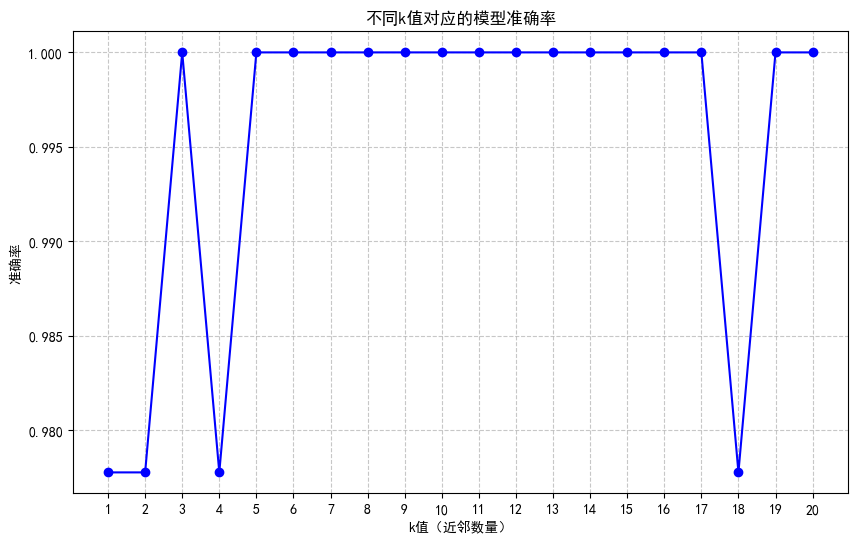

最佳k值: 3

模型准确率: 1.0

混淆矩阵:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



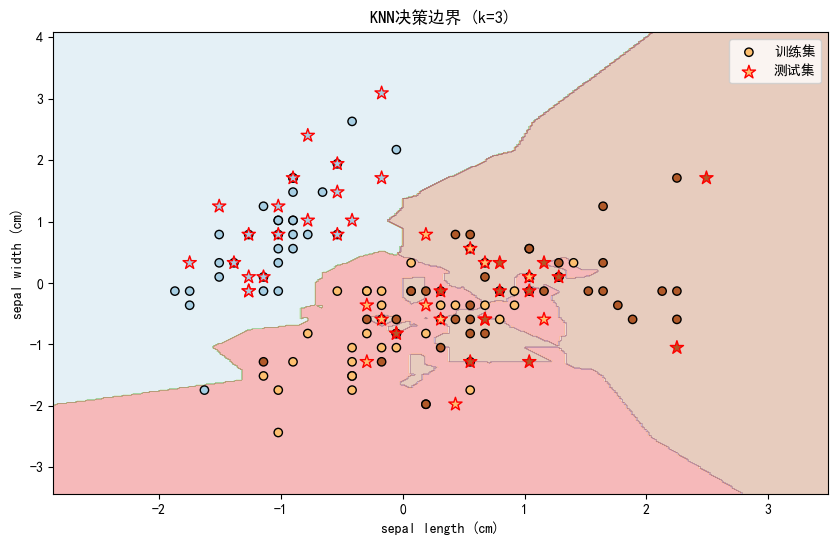


新样本预测结果: setosa


In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 加载数据集（使用鸢尾花数据集作为示例）
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 查看数据集信息
print("特征名称:", iris.feature_names)
print("标签名称:", iris.target_names)
print("数据集形状:", X.shape)
print("前5条数据:\n", X[:5])

# 2. 数据预处理 - 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42  # 30%作为测试集
)

print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

# 4. 训练KNN模型
# 尝试不同的k值，找到最佳性能
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 绘制不同k值对应的准确率
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b')
plt.title('不同k值对应的模型准确率')
plt.xlabel('k值（近邻数量）')
plt.ylabel('准确率')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 选择准确率最高的k值
best_k = k_range[np.argmax(scores)]
print(f"最佳k值: {best_k}")

# 使用最佳k值训练模型
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# 5. 模型预测
y_pred = best_knn.predict(X_test)

# 6. 模型评估
print("\n模型准确率:", accuracy_score(y_test, y_pred))
print("\n混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("\n分类报告:\n", classification_report(
    y_test, y_pred, target_names=iris.target_names
))

# 7. 可视化决策边界（仅使用前两个特征以便可视化）
# 为了可视化，我们使用前两个特征重新训练模型
X_vis = X_scaled[:, :2]  # 只取前两个特征
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

# 使用最佳k值训练简化模型
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# 创建网格以绘制决策边界
h = 0.02  # 网格步长
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测网格点的类别
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和数据点
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.Paired, edgecolors='k', label='训练集')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=plt.cm.Paired, edgecolors='red', marker='*', s=100, label='测试集')
plt.title(f'KNN决策边界 (k={best_k})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# 8. 使用模型进行新数据预测
# 示例：创建一个新样本并进行预测
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # 类似山鸢尾的特征
new_sample_scaled = scaler.transform(new_sample)  # 标准化新样本
prediction = best_knn.predict(new_sample_scaled)
print(f"\n新样本预测结果: {iris.target_names[prediction][0]}")